# Vergleich des NWC&thinsp;SAF-CI-Produktes

In diesem Notebook vergleichen wir das NWC&thinsp;CI-Produkt, das wir von Météo-France-Toulouse bekommen haben mit dem selbst gerechneten. Das Ziel ist zu sehen, ob es Unterschiede gibt oder ob die Ausgaben identisch sind.

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

from standard_config import *
import glob

from analysis_tools import grid_and_interpolation as gi
import fixed_colourbar as fc

import seaborn as sns
sns.set_context("talk")

import sys
sys.path.append("{}/2018-05_cieval/python/filtered_graph_branch".format(proj_path))
import cieval_plotting_tools as cpt

import matplotlib as mpl

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
given_path = "{}/2018-05_cieval/data/CI_v2018/20130618/".format(proj_path)
own_path = "/vols/satellite/home/lenk/nwcsaf_ci_v2018/export/CI"

Für den Vergleich fangen wir mal mit dem 18.06.2013 an, da wir für die 2010er Daten keine CAMS-RA-Daten haben.

In [3]:
timestamp = "20130618T120000Z"

In [4]:
given_file = glob.glob("{}/*CI*{}*".format(given_path,timestamp))

In [5]:
own_file = glob.glob("{}/*CI*{}*".format(own_path,timestamp))

In [6]:
print(given_file,own_file)

['/vols/satellite/home/lenk/proj/2018-05_cieval/data/CI_v2018/20130618/S_NWC_CI_MSG3_Europe-VISIR_20130618T120000Z.nc'] ['/vols/satellite/home/lenk/nwcsaf_ci_v2018/export/CI/S_NWC_CI_MSG2_rss-eu-VISIR_20130618T120000Z.nc']


In [7]:
ci_given= xr.open_dataset(given_file[0])
ci_own = xr.open_dataset(own_file[0])

In [8]:
ci_given


<xarray.Dataset>
Dimensions:         (nx: 1028, ny: 548, pal01_colors: 256, pal_RGB: 3)
Coordinates:
    lat             (ny, nx) float32 ...
    lon             (ny, nx) float32 ...
  * ny              (ny) float32 5100000.0 5096999.5 ... 3461779.5 3458779.2
  * nx              (nx) float32 -899999.8 -896999.4 ... 2178414.0 2181414.5
Dimensions without coordinates: pal01_colors, pal_RGB
Data variables:
    ci_prob30       (ny, nx) float32 ...
    ci_prob60       (ny, nx) float32 ...
    ci_prob90       (ny, nx) float32 ...
    ci_status_flag  (ny, nx) float32 ...
    ci_conditions   (ny, nx) float32 ...
    ci_quality      (ny, nx) float32 ...
    ci_pal          (pal01_colors, pal_RGB) uint8 ...
Attributes:
    Conventions:                  CF-1.6
    title:                        NWC GEO Convection Initiation Product
    history:                      2018-05-24T15:40:50Z autonesf Product Creat...
    institution:                  Agencia Estatal de Meteorología (AEMET)
    source:  

Text(0.5, 1.0, 'eigene Berechnung')

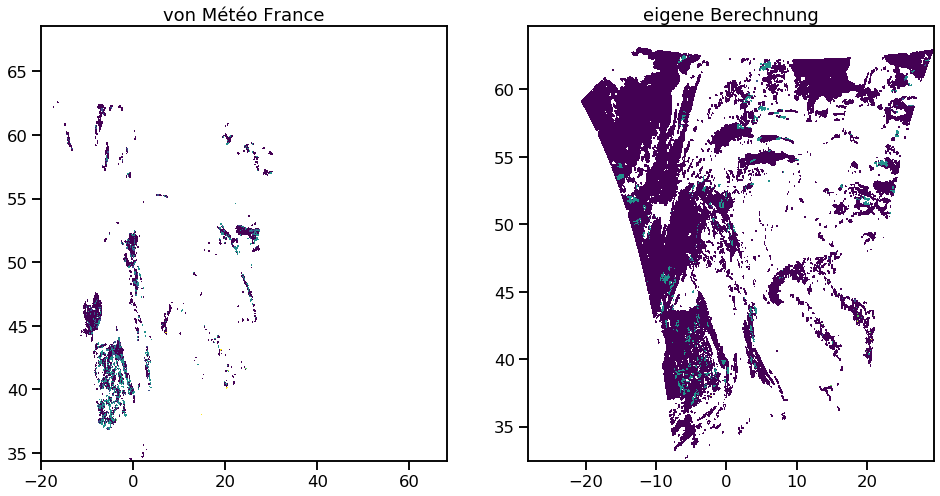

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].pcolor(ci_given.lon.data,ci_given.lat.data,ci_given.ci_prob30.data)
ax[0].set_title(u"von Météo France")

ax[1].pcolor(ci_own.lon.data,ci_own.lat.data,ci_own.ci_prob30.data)
ax[1].set_title(u"eigene Berechnung")

Da sind leider größere Unterschiede dabei. In der selbst prozessierten Variante sind viel mehr Pixel der niedrigesten Wahrscheinlichkeit ausgewiesen. Da werden wahrscheinlich die Filter ganz anders berechnet.

Außerde, sind die Domänen unterschiedlich für einen Vergleich sollten wir beide Daten zumindest erstmal in eine gleiche Domäne bringen.

In [10]:
cig_lonmin = np.nanmin(ci_given.lon.data)
cig_lonmax = np.nanmax(ci_given.lon.data)
cig_latmin = np.nanmin(ci_given.lat.data)
cig_latmax = np.nanmax(ci_given.lat.data)

In [11]:
cio_lonmin = np.nanmin(ci_own.lon.data)
cio_lonmax = np.nanmax(ci_own.lon.data)
cio_latmin = np.nanmin(ci_own.lat.data)
cio_latmax = np.nanmax(ci_own.lat.data)

In [12]:
print(u"Eckpunktkoordinaten, Météo France\nLänge: {:2.3f}, {:2.3f}°O\nBreite: {:2.3f}, {:2.3f}°N".format(cig_lonmin,cig_lonmax,cig_latmin,cig_latmax))

Eckpunktkoordinaten, Météo France
Länge: -20.005, 68.037°O
Breite: 34.339, 68.542°N


In [13]:
print(u"Eckpunktkoordinaten, RSS-EU\nLänge: {:2.3f}, {:2.3f}°O\nBreite: {:2.3f}, {:2.3f}°N".format(cio_lonmin,cio_lonmax,cio_latmin,cio_latmax))

Eckpunktkoordinaten, RSS-EU
Länge: -28.219, 29.432°O
Breite: 32.437, 64.663°N


Die Domäne der NWC&thinsp;SAF ist größer, fängt aber etwas weiter im Osten und Norden an und reicht etwas weiter nach Norden. Als Eckpunktkoordinaten bietet sich deshalb eine Kombination aus &lambda;<sub>min, NWC&thinsp;SAF</sub>, &lambda;<sub>max, RSS EU</sub>, &phi;<sub>min, NWC&thinsp;SAF</sub>, &phi;<sub>max, RSS EU</sub> an.

In [14]:
region_lon_min,region_lon_max,region_lat_min,region_lat_max = cig_lonmin, cio_lonmax, cig_latmin, cio_latmax

Als nächstes rechnen wir diese geodätischen Koordinaten in die Gitterpunktkoordinaten der beiden Gitter um.

In [15]:
corner_points = np.array([[region_lat_min,region_lat_max],[region_lon_min,region_lon_max]])

In [16]:
((rmx_g,rmn_g),(cmn_g,cmx_g)) = gi.get_index_kdtree(corner_points,
                                          np.ma.masked_invalid(ci_given.lat.data),
                                          np.ma.masked_invalid(ci_given.lon.data))
((rmx_o,rmn_o),(cmn_o,cmx_o)) = gi.get_index_kdtree(corner_points,
                                      np.ma.masked_invalid(ci_own.lat.data),
                                      np.ma.masked_invalid(ci_own.lon.data))

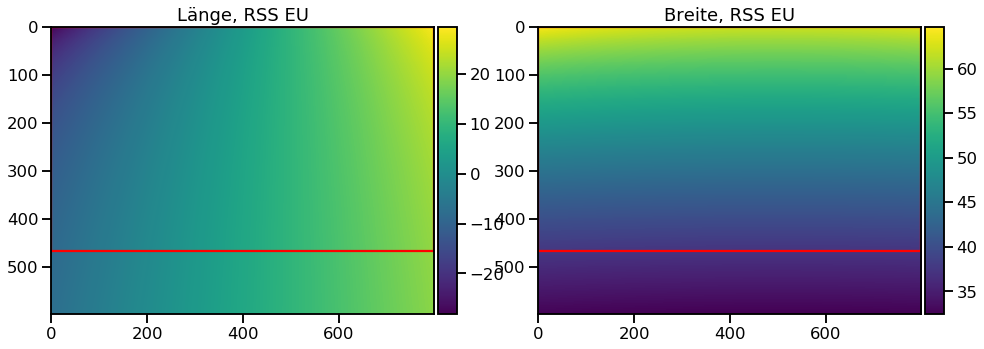

In [17]:
fig,ax = plt.subplots(1,2,figsize=(16,10))
p0 = ax[0].imshow(ci_own.lon.data)
fc.colourbar(p0)
ax[0].set_title("Länge, RSS EU")
ax[0].plot([cmn_o,cmx_o],[rmn_o,rmn_o],color='red')
ax[0].plot([cmn_o,cmx_o],[rmx_o,rmx_o],color='red')
ax[0].plot([cmn_o,cmn_o],[rmn_o,rmx_o],color='red')
ax[0].plot([cmx_o,cmx_o],[rmn_o,rmx_o],color='red')
p1 = ax[1].imshow(ci_own.lat.data)
fc.colourbar(p1)
ax[1].set_title(u"Breite, RSS EU")
ax[1].plot([cmn_o,cmx_o],[rmn_o,rmn_o],color='red')
ax[1].plot([cmn_o,cmx_o],[rmx_o,rmx_o],color='red')
ax[1].plot([cmn_o,cmn_o],[rmn_o,rmx_o],color='red')
ax[1].plot([cmx_o,cmx_o],[rmn_o,rmx_o],color='red')

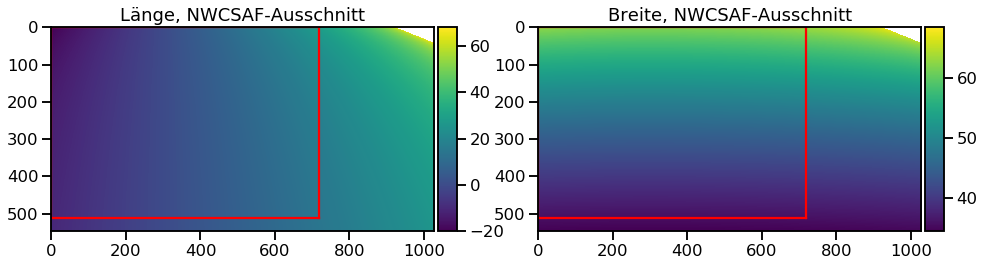

In [18]:
fig,ax = plt.subplots(1,2,figsize=(16,10))
p0 = ax[0].imshow(ci_given.lon.data)
fc.colourbar(p0)
ax[0].set_title("Länge, NWCSAF-Ausschnitt")
ax[0].plot([cmn_g,cmx_g],[rmn_g,rmn_g],color='red')
ax[0].plot([cmn_g,cmx_g],[rmx_g,rmx_g],color='red')
ax[0].plot([cmn_g,cmn_g],[rmn_g,rmx_g],color='red')
ax[0].plot([cmx_g,cmx_g],[rmn_g,rmx_g],color='red')
p1 = ax[1].imshow(ci_given.lat.data)
fc.colourbar(p1)
ax[1].set_title("Breite, NWCSAF-Ausschnitt")
ax[1].plot([cmn_g,cmx_g],[rmn_g,rmn_g],color='red')
ax[1].plot([cmn_g,cmx_g],[rmx_g,rmx_g],color='red')
ax[1].plot([cmn_g,cmn_g],[rmn_g,rmx_g],color='red')
ax[1].plot([cmx_g,cmx_g],[rmn_g,rmx_g],color='red')

In [19]:
cutout_nwcsaf = ci_given.ci_prob30[rmn_g:rmx_g,cmn_g:cmx_g]

In [20]:
cutout_lon_g = ci_given.lon.data[rmn_g:rmx_g,cmn_g:cmx_g]
cutout_lat_g = ci_given.lat.data[rmn_g:rmx_g,cmn_g:cmx_g]

In [21]:
np.min(cutout_lon_g), np.max(cutout_lon_g), np.min(cutout_lat_g), np.max(cutout_lat_g)

(-20.00494, 29.432552, 35.706654, 63.84014)

In [22]:
cutout_eu = ci_own.ci_prob30[rmn_o:rmx_o,cmn_o:cmx_o]
cutout_lon_o  = ci_own.lon.data[rmn_o:rmx_o,cmn_o:cmx_o]
cutout_lat_o  = ci_own.lat.data[rmn_o:rmx_o,cmn_o:cmx_o]

In [23]:
cutout_eu.shape

(468, 799)

In [24]:
np.min(cutout_lon_o), np.max(cutout_lon_o), np.min(cutout_lat_o), np.max(cutout_lat_o)

(-28.219007, 29.357698, 37.304344, 64.66296)

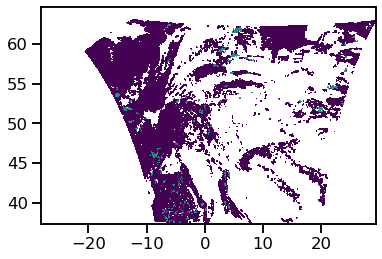

In [25]:
plt.pcolormesh(cutout_lon_o,cutout_lat_o,cutout_eu)

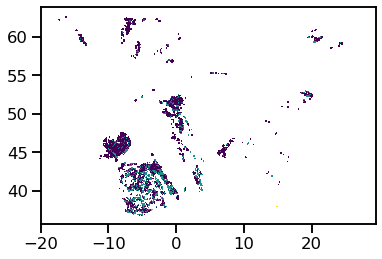

In [26]:
plt.pcolormesh(cutout_lon_g,cutout_lat_g,cutout_nwcsaf)

Das sind unterschiedliche Ausschnitte! Warum geht das nicht?

Stimmt ja, die NWCSAF-Daten sind vom Hauptscan!

In [27]:
# CI colour map as defined by NWCSAF 
ci_list = ci_own.ci_pal.data[:4] / 255
ci_cmap = mpl.colors.ListedColormap(ci_list)
ci_names = ['0','25','50','75','100']
ci_norm = mpl.colors.BoundaryNorm(np.arange(0,5), ci_cmap.N)

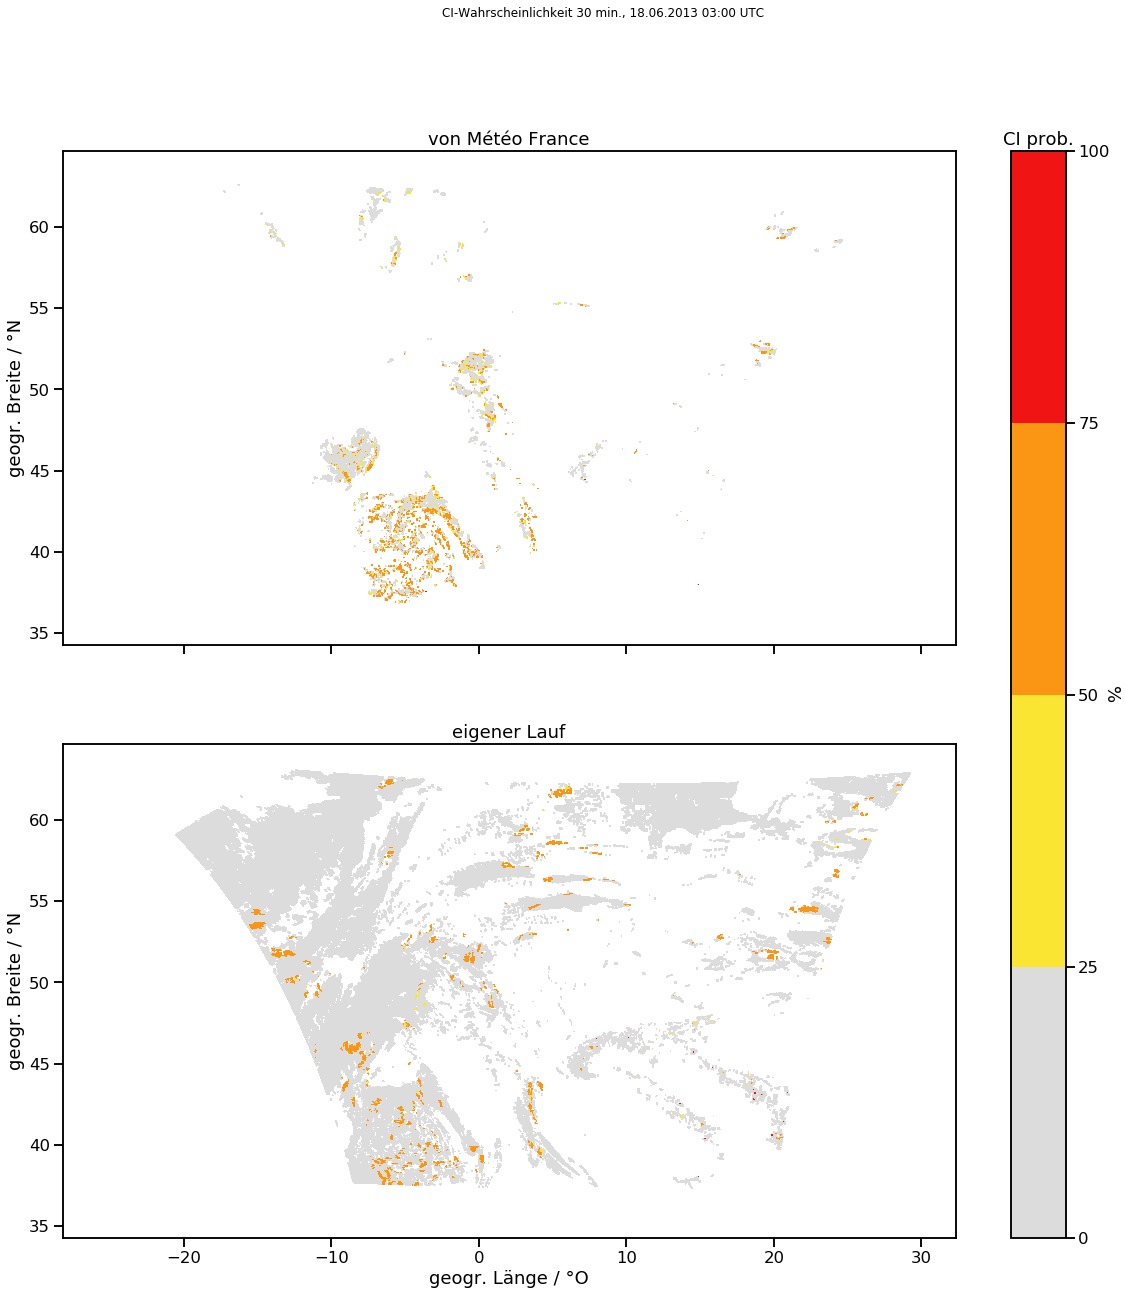

In [28]:
fig,axes = plt.subplots(2,1,figsize=(20,20),sharex=True,sharey=True)
im = axes[0].pcolormesh(cutout_lon_g,cutout_lat_g,cutout_nwcsaf,norm=ci_norm,cmap=ci_cmap)
axes[0].set_title("von Météo France")
axes[1].pcolormesh(cutout_lon_o,cutout_lat_o,cutout_eu,norm=ci_norm,cmap=ci_cmap)
axes[1].set_title("eigener Lauf")

axes[1].set_xlabel(u"geogr. Länge / °O")
axes[0].set_ylabel(u"geogr. Breite / °N")
axes[1].set_ylabel(u"geogr. Breite / °N")
plt.suptitle("CI-Wahrscheinlichkeit 30 min., 18.06.2013 03:00 UTC")

ci_cb = fig.colorbar(im, ax=axes.ravel().tolist())
ci_cb.ax.set_yticklabels(ci_names)
ci_cb.ax.set_ylabel('%', rotation=270)
ci_cb.ax.set_title("CI prob.")
ci_cb.ax.get_yaxis().labelpad = 10

plt.savefig("/vols/satellite/home/lenk/nwcsaf_ci_v2018/CI-Produkt-Vergleich.png")